### **Data Engineering Project**

Crimes in Boston dataset


# **1. PREPROCESSING**

1. Load dataset using pandas 


In [ ]:
# import Pandas package
import pandas as pd
# drag the excel file to 'content' (left)
# load Crime dataset as a csv file
crimes = pd.read_csv('crime.csv', engine='python' )  # result: 319073 rows × 17 columns

# in json: pd.read_json()

In [ ]:
# to view the dataset
display(crimes)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [ ]:
display(crimes['SHOOTING'].iloc[4108])

'Y'

In [ ]:
# load offense_codes.csv
offencecodes = pd.read_csv('offense_codes.csv', engine='python' )   # result: 576 rows × 2 columns

In [ ]:
# to view the dataset
offencecodes

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION
...,...,...
571,1806,DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS
572,1807,DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS
573,1610,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS
574,2010,HOME INVASION


ok so now we can see our dataset and start different preprocessing steps 

some steps suggested in the assignment:
*   remove duplicate information and uninformative columns
* compute some statistics
*   create training and test data for machine learning tasks

* ... and more

1. Kaggle: www.kaggle.com
2. Scikit-learn documentation : https://scikit-learn.org/stable/user_guide.html  --> here you can find preprocessing techniques at "6. Dataset transformations" and then "6.3 preprocessing data"
3. Seaborn documentation: https://seaborn.pydata.org/tutorial.html


In [ ]:
import numpy as np
#offense_code = crimes['OFFENSE_CODE']

# we check the types of all the values of the columns:
# other possibility is below 'crimes.info()'

#crimes['INCIDENT_NUMBER']
#OFFENSE_CODE = int64
#'INCIDENT_NUMBER'= object
#crimes['OFFENSE_CODE_GROUP'] object
#crimes['OFFENSE_DESCRIPTION'] object
#str(crimes['OFFENSE_DESCRIPTION'])
#crimes['DISTRICT'] object
#crimes['REPORTING_AREA'] object
# crimes['SHOOTING'] object 
#crimes['SHOOTING'].isna().sum() # 318054 nans 
#crimes['OCCURRED_ON_DATE'] object
#crimes['YEAR'] int
#crimes['MONTH'] int
#crimes['DAY_OF_WEEK'] object
#crimes['HOUR']  #int64
#crimes['UCR_PART'] object
#crimes['STREET'] object
#crimes['Lat'] float 64
#crimes['Long'] float64
#crimes['Location'] object

In [ ]:
#checking unique values of each variable
crimes.nunique()

INCIDENT_NUMBER        282517
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            879
SHOOTING                    1
OCCURRED_ON_DATE       233229
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4657
Lat                     18178
Long                    18178
Location                18194
dtype: int64

In [ ]:
#as you can see there are 282517 unique incidents, but dataset contains 319073, which means there are duplicates.
#let's check if there are identical rows
crimes.duplicated() 


0         False
1         False
2         False
3         False
4         False
          ...  
319068    False
319069    False
319070    False
319071    False
319072    False
Length: 319073, dtype: bool

In [ ]:
#as you can see there are 23 identical rows
crimes.duplicated().sum()

23

In [ ]:
#so we should remove them from the dataset
crimes = crimes.drop_duplicates()

In [ ]:
#remove uninformative columns: INCIDENT_NUMBER, OFFENCE_CODE, OCCURED_ON_DATE, UCR_PART, LOCATION
# also remove street?
crimes= crimes.drop(columns = ['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OCCURRED_ON_DATE', 'UCR_PART', 'Location'])


In [ ]:
crimes

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371
1,Vandalism,VANDALISM,C11,347,NaN,2018,8,Tuesday,0,HECLA ST,42.306821,-71.060300
2,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018,9,Monday,19,CAZENOVE ST,42.346589,-71.072429
3,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018,9,Monday,21,NEWCOMB ST,42.334182,-71.078664
4,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018,9,Monday,21,DELHI ST,42.275365,-71.090361
...,...,...,...,...,...,...,...,...,...,...,...,...
319068,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016,6,Sunday,17,COVENTRY ST,42.336951,-71.085748
319069,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015,7,Thursday,13,RIVER ST,42.255926,-71.123172
319070,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015,7,Thursday,13,RIVER ST,42.255926,-71.123172
319071,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016,5,Tuesday,19,NEW WASHINGTON ST,42.302333,-71.111565


In [ ]:
#checking missing values in each column
crimes.isna().sum()

OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318031
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
STREET                  10871
Lat                     19998
Long                    19998
dtype: int64

In [ ]:
# SHOOTING: change values nan to 0 and Y to 1
crimes['SHOOTING'].isna().sum() # 318031 nans 
crimes['SHOOTING'] = crimes['SHOOTING'].fillna(0) # change nans in 0
# change Y in 1
crimes['SHOOTING'] = crimes['SHOOTING'].replace(to_replace = ['Y'], value = [1])

In [ ]:
crimes

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,Larceny,LARCENY ALL OTHERS,D14,808,0,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371
1,Vandalism,VANDALISM,C11,347,0,2018,8,Tuesday,0,HECLA ST,42.306821,-71.060300
2,Towed,TOWED MOTOR VEHICLE,D4,151,0,2018,9,Monday,19,CAZENOVE ST,42.346589,-71.072429
3,Investigate Property,INVESTIGATE PROPERTY,D4,272,0,2018,9,Monday,21,NEWCOMB ST,42.334182,-71.078664
4,Investigate Property,INVESTIGATE PROPERTY,B3,421,0,2018,9,Monday,21,DELHI ST,42.275365,-71.090361
...,...,...,...,...,...,...,...,...,...,...,...,...
319068,Warrant Arrests,WARRANT ARREST,D4,285,0,2016,6,Sunday,17,COVENTRY ST,42.336951,-71.085748
319069,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,0,2015,7,Thursday,13,RIVER ST,42.255926,-71.123172
319070,Warrant Arrests,WARRANT ARREST,E18,520,0,2015,7,Thursday,13,RIVER ST,42.255926,-71.123172
319071,Warrant Arrests,WARRANT ARREST,E13,569,0,2016,5,Tuesday,19,NEW WASHINGTON ST,42.302333,-71.111565


In [ ]:
#dropping rows with missing values  
crimes = crimes.dropna(axis=0, how='any')
crimes.isna().sum()

OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
STREET                 0
Lat                    0
Long                   0
dtype: int64

In [ ]:
# OFFENSE_CODE_GROUP: maybe set all these values to capital letters because OFFENSE_DESCRIPTION	is also in caps
uppered_ocg = []
for value in crimes['OFFENSE_CODE_GROUP']:
  up= value.upper()
  uppered_ocg.append(up)

crimes['OFFENSE_CODE_GROUP'] = uppered_ocg
display(crimes['OFFENSE_CODE_GROUP'])

0                      LARCENY
1                    VANDALISM
2                        TOWED
3         INVESTIGATE PROPERTY
4         INVESTIGATE PROPERTY
                  ...         
319068         WARRANT ARRESTS
319069                HOMICIDE
319070         WARRANT ARRESTS
319071         WARRANT ARRESTS
319072         WARRANT ARRESTS
Name: OFFENSE_CODE_GROUP, Length: 296641, dtype: object

In [ ]:
# Transform the occurrence time of 'HOUR' to parts of the day (morning, noon, afternoon, evening, night) 
crimes['HOUR'].replace({1: 'Night',
                      2: 'Night',
                      3: 'Night',
                      4: 'Night',
                      5: 'Morning',
                      6: 'Morning',
                      7: 'Morning', 
                      8: 'Morning',
                      9: 'Morning',
                      10: 'Morning',
                      11: 'Morning',
                      12: 'Noon',
                      13: 'Noon',
                      14: 'Noon',
                      15: 'Afternoon',
                      16: 'Afternoon',
                      17: 'Afternoon',
                      18: 'Evening',
                      19: 'Evening',
                      20: 'Evening',
                      21: 'Evening',
                      22: 'Evening',
                      23: 'Evening',
                      0: 'Night',}, inplace=True)

In [ ]:
crimes['HOUR'] 

0              Noon
1             Night
2           Evening
3           Evening
4           Evening
            ...    
319068    Afternoon
319069         Noon
319070         Noon
319071      Evening
319072        Night
Name: HOUR, Length: 296641, dtype: object

In [ ]:
# details and charachteristics of data columns:
# number of non-null values per column and type of data in every column
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296641 entries, 0 to 319072
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE_GROUP   296641 non-null  object 
 1   OFFENSE_DESCRIPTION  296641 non-null  object 
 2   DISTRICT             296641 non-null  object 
 3   REPORTING_AREA       296641 non-null  object 
 4   SHOOTING             296641 non-null  int64  
 5   YEAR                 296641 non-null  int64  
 6   MONTH                296641 non-null  int64  
 7   DAY_OF_WEEK          296641 non-null  object 
 8   HOUR                 296641 non-null  object 
 9   STREET               296641 non-null  object 
 10  Lat                  296641 non-null  float64
 11  Long                 296641 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 29.4+ MB


In [ ]:
# the list of columns below are integer value codes but they should not be 
# considered as numerical variables, so they are transformed to strings/objects

transform_str_list = ['YEAR', 'MONTH'] # exclude shooting to make plots of int values for shooting

crimes[transform_str_list] = crimes[transform_str_list].astype(str)

In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296641 entries, 0 to 319072
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE_GROUP   296641 non-null  object 
 1   OFFENSE_DESCRIPTION  296641 non-null  object 
 2   DISTRICT             296641 non-null  object 
 3   REPORTING_AREA       296641 non-null  object 
 4   SHOOTING             296641 non-null  int64  
 5   YEAR                 296641 non-null  object 
 6   MONTH                296641 non-null  object 
 7   DAY_OF_WEEK          296641 non-null  object 
 8   HOUR                 296641 non-null  object 
 9   STREET               296641 non-null  object 
 10  Lat                  296641 non-null  float64
 11  Long                 296641 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 29.4+ MB


extract columns for preprocessing in seperate variables

In [ ]:
#extract columns for preprocessing
ocgroup = crimes['OFFENSE_CODE_GROUP']
odescription = crimes['OFFENSE_DESCRIPTION']
district = crimes['DISTRICT']
reportingarea = crimes['REPORTING_AREA']
shooting = crimes['SHOOTING']
year = crimes['YEAR']
month = crimes['MONTH']
dayoftheweek = crimes['DAY_OF_WEEK']
hour = crimes['HOUR']
street = crimes['STREET'] # include back the Street variable and exclude the Lat and Long variable
lat = crimes['Lat'] 
long = crimes['Long']

In [ ]:
(crimes['SHOOTING']==1).sum() #783 met '1'
# and now it says 571?
# now 82???
# now 1019 and i think this is the right amount

976

In [ ]:
display(shooting.iloc[4108]) # check if it has worked, yes

0

DUMMY + SPLIT DATASET

In [ ]:
# create dummy variables + indices of positive and negative instances: 
vandalism = [] #to store zeros and ones for vandalism
vandalism1 = [] #to store positive vandalism instances
vandalism0 = [] #to store negative vandalism instances
for i in range(len(ocgroup)):
  if ocgroup.iloc[i]=="VANDALISM": #check if vandalism
    vandalism.append(1) #append 1 to vandalism list
    vandalism1.append(i) #add index of instance to positive instances list
  else:
    vandalism.append(0) #append 0 to vandalism list
    vandalism0.append(i) #add index of instance to negative instances list
vandalism = pd.Series(vandalism) 

drugs = []
drugs1 = []
drugs0 = []
for i in range(len(ocgroup)):
  if ocgroup.iloc[i]=="DRUG VIOLATION":
    drugs.append(1)
    drugs1.append(i)
  else:
    drugs.append(0)
    drugs0.append(i)
drugs = pd.Series(drugs)

motor = []
motor1 =[]
motor0 = []
for i in range(len(ocgroup)):
  if ocgroup.iloc[i]=="MOTOR VEHICLE ACCIDENT RESPONSE":
    motor.append(1)
    motor1.append(i)
  else:
    motor.append(0)
    motor0.append(i)
motor = pd.Series(motor)

assault = []
assault1 = []
assault0 = [] 
for i in range(len(ocgroup)):
  if ocgroup.iloc[i]=="SIMPLE ASSAULT":
    assault.append(1)
    assault1.append(i)
  else:
    assault.append(0)
    assault0.append(i)
assault = pd.Series(assault)

In [ ]:
# create dependent variables with 10% positive and 90% negative instances
import random

randomassault1 = random.sample(range(1, len(assault1)), 1000) #1000 random instances from positive instances list (index)
randomassault0 = random.sample(range(1, len(assault0)), 9000) #9000 random instances from negative instances list (index)
assault_ = []
for i in randomassault1:
  assault_.append(assault[assault1[i]]) #assault1[i]: i-th index from positive list => assault[...]: correct instance
for j in randomassault0:
  assault_.append(assault[assault0[i]]) #assault0[i]: i-th index from negative list => assault[...]: correct instance
assault_ = pd.Series(assault_)

randomdrugs1 = random.sample(range(1, len(drugs1)), 1000)
randomdrugs0 = random.sample(range(1, len(drugs0)), 9000)
drugs_ = []
for i in randomdrugs1:
  drugs_.append(drugs[drugs1[i]])
for j in randomdrugs0:
  drugs_.append(drugs[drugs0[i]])
drugs_ = pd.Series(drugs_)

randommotor1 = random.sample(range(1, len(motor1)), 1000)
randommotor0 = random.sample(range(1, len(motor0)), 9000)
motor_ = []
for i in randommotor1:
  motor_.append(motor[motor1[i]])
for j in randommotor0:
  motor_.append(motor[motor0[i]])
motor_ = pd.Series(motor_)

randomvandalism1 = random.sample(range(1, len(vandalism1)), 1000)
randomvandalism0 = random.sample(range(1, len(vandalism0)), 9000)
vandalism_ = []
for i in randomvandalism1:
  vandalism_.append(vandalism[vandalism1[i]])
for j in randomvandalism0:
  vandalism_.append(vandalism[vandalism0[i]])
vandalism_ = pd.Series(vandalism_)

In [ ]:
# for vandalism: create independent variables according to balanced dependent variables
district_v = []
for i in randomvandalism1:
  district_v.append(district.iloc[vandalism1[i]]) #vandalism1[i]: i-th index in positive list => district[...]: correct instance
for j in randomvandalism0:
  district_v.append(district.iloc[vandalism0[i]]) #vandalism0[i]: i-th index in negative list => district[...]: correct instance
district_v = pd.Series(district_v)

year_v = []
for i in randomvandalism1:
  year_v.append(year.iloc[vandalism1[i]])
for j in randomvandalism0:
  year_v.append(year.iloc[vandalism0[i]])
year_v = pd.Series(year_v)

month_v = []
for i in randomvandalism1:
  month_v.append(month.iloc[vandalism1[i]])
for j in randomvandalism0:
  month_v.append(month.iloc[vandalism0[i]])
month_v = pd.Series(month_v)

dayoftheweek_v = []
for i in randomvandalism1:
  dayoftheweek_v.append(dayoftheweek.iloc[vandalism1[i]])
for j in randomvandalism0:
  dayoftheweek_v.append(dayoftheweek.iloc[vandalism0[i]])
dayoftheweek_v = pd.Series(dayoftheweek_v)

hour_v = []
for i in randomvandalism1:
  hour_v.append(hour.iloc[vandalism1[i]])
for j in randomvandalism0:
  hour_v.append(hour.iloc[vandalism0[i]])
hour_v = pd.Series(hour_v)

In [ ]:
# for drugs: create independent variables according to balanced dependent variables
district_d = []
for i in randomdrugs1:
  district_d.append(district.iloc[drugs1[i]])
for j in randomdrugs0:
  district_d.append(district.iloc[drugs0[i]])
district_d = pd.Series(district_d)

year_d = []
for i in randomdrugs1:
  year_d.append(year.iloc[drugs1[i]])
for j in randomdrugs0:
  year_d.append(year.iloc[drugs0[i]])
year_d = pd.Series(year_d)

month_d = []
for i in randomdrugs1:
  month_d.append(month.iloc[drugs1[i]])
for j in randomdrugs0:
  month_d.append(month.iloc[drugs0[i]])
month_d = pd.Series(month_d)

dayoftheweek_d = []
for i in randomdrugs1:
  dayoftheweek_d.append(dayoftheweek.iloc[drugs1[i]])
for j in randomdrugs0:
  dayoftheweek_d.append(dayoftheweek.iloc[drugs0[i]])
dayoftheweek_d = pd.Series(dayoftheweek_d)

hour_d = []
for i in randomdrugs1:
  hour_d.append(hour.iloc[drugs1[i]])
for j in randomdrugs0:
  hour_d.append(hour.iloc[drugs0[i]])
hour_d = pd.Series(hour_d)

In [ ]:
# for assault: create independent variables according to balanced dependent variables
district_a = []
for i in randomassault1:
  district_a.append(district.iloc[assault1[i]])
for j in randomassault0:
  district_a.append(district.iloc[assault0[i]])
district_a = pd.Series(district_a)

year_a = []
for i in randomassault1:
  year_a.append(year.iloc[assault1[i]])
for j in randomassault0:
  year_a.append(year.iloc[assault0[i]])
year_a = pd.Series(year_a)

month_a = []
for i in randomassault1:
  month_a.append(month.iloc[assault1[i]])
for j in randomassault0:
  month_a.append(month.iloc[assault0[i]])
month_a = pd.Series(month_a)

dayoftheweek_a = []
for i in randomassault1:
  dayoftheweek_a.append(dayoftheweek.iloc[assault1[i]])
for j in randomassault0:
  dayoftheweek_a.append(dayoftheweek.iloc[assault0[i]])
dayoftheweek_a = pd.Series(dayoftheweek_a)

hour_a = []
for i in randomassault1:
  hour_a.append(hour.iloc[assault1[i]])
for j in randomassault0:
  hour_a.append(hour.iloc[assault0[i]])
hour_a = pd.Series(hour_a)

In [ ]:
# for motor: create independent variables according to balanced dependent variables
district_m = []
for i in randommotor1:
  district_m.append(district.iloc[motor1[i]])
for j in randommotor0:
  district_m.append(district.iloc[motor0[i]])
district_m = pd.Series(district_m)

year_m = []
for i in randommotor1:
  year_m.append(year.iloc[motor1[i]])
for j in randommotor0:
  year_m.append(year.iloc[motor0[i]])
year_m = pd.Series(year_m)

month_m = []
for i in randommotor1:
  month_m.append(month.iloc[motor1[i]])
for j in randommotor0:
  month_m.append(month.iloc[motor0[i]])
month_m = pd.Series(month_m)

dayoftheweek_m = []
for i in randommotor1:
  dayoftheweek_m.append(dayoftheweek.iloc[motor1[i]])
for j in randommotor0:
  dayoftheweek_m.append(dayoftheweek.iloc[motor0[i]])
dayoftheweek_m = pd.Series(dayoftheweek_m)

hour_m = []
for i in randommotor1:
  hour_m.append(hour.iloc[motor1[i]])
for j in randommotor0:
  hour_m.append(hour.iloc[motor0[i]])
hour_m = pd.Series(hour_m)

In [ ]:
# split the data set in train-test 
import numpy as np 
from sklearn.model_selection import train_test_split
indices=np.arange(10000)
indices_train, indices_test  = train_test_split(indices, test_size=0.20, random_state=0)
indices_train, indices_val  = train_test_split(indices_train, test_size=0.20, random_state=0)

In [ ]:
# function for preprocessing discrete features
from scipy import stats
import pandas as pd
import numpy as np

def Preprocessing_discrete(Var, train_ind, Var_name):
    Var_train=Var.iloc[train_ind]
    Var_pre = Var.fillna(value = Var_train.mode().iloc[0]) #replace missing values by mode of training set
    Var_preprocessed=pd.get_dummies(Var_pre,prefix= str(Var_name))
    Categories=list(Var_preprocessed.columns.values) #show categories
    #from a categorical variable with k categories, we only create k-1 dummy variables
    Reference_Category = Categories[0]  #the dropped category becomes the reference category
    Var_preprocessed = Var_preprocessed.iloc[:, 1:]
    Categories = Categories[1:]
    return (Var_preprocessed, Categories, Reference_Category)

In [ ]:
# for vandalism: preprocessing discrete features 
Data_preprocessed_v=[]

District_preprocessed = Preprocessing_discrete(district_v, indices_train, 'District')
Data_preprocessed_v.append(District_preprocessed[0])

Year_preprocessed = Preprocessing_discrete(year_v, indices_train, 'Year')
Data_preprocessed_v.append(Year_preprocessed[0])

Month_preprocessed = Preprocessing_discrete(month_v, indices_train, 'Month')
Data_preprocessed_v.append(Month_preprocessed[0])

Dayoftheweek_preprocessed = Preprocessing_discrete(dayoftheweek_v, indices_train, 'Dayoftheweek')
Data_preprocessed_v.append(Dayoftheweek_preprocessed[0])

Hour_preprocessed = Preprocessing_discrete(hour_v, indices_train, 'Hour')
Data_preprocessed_v.append(Hour_preprocessed[0])

Data_preprocessed_full_v= pd.concat(Data_preprocessed_v, axis=1)

In [ ]:
# for drugs: preprocessing discrete features 
Data_preprocessed_d=[]

District_preprocessed = Preprocessing_discrete(district_d, indices_train, 'District')
Data_preprocessed_d.append(District_preprocessed[0])

Year_preprocessed = Preprocessing_discrete(year_d, indices_train, 'Year')
Data_preprocessed_d.append(Year_preprocessed[0])

Month_preprocessed = Preprocessing_discrete(month_d, indices_train, 'Month')
Data_preprocessed_d.append(Month_preprocessed[0])

Dayoftheweek_preprocessed = Preprocessing_discrete(dayoftheweek_d, indices_train, 'Dayoftheweek')
Data_preprocessed_d.append(Dayoftheweek_preprocessed[0])

Hour_preprocessed = Preprocessing_discrete(hour_d, indices_train, 'Hour')
Data_preprocessed_d.append(Hour_preprocessed[0])

Data_preprocessed_full_d= pd.concat(Data_preprocessed_d, axis=1)

In [ ]:
# for assault: preprocessing discrete features 
Data_preprocessed_a=[]

District_preprocessed = Preprocessing_discrete(district_a, indices_train, 'District')
Data_preprocessed_a.append(District_preprocessed[0])

Year_preprocessed = Preprocessing_discrete(year_a, indices_train, 'Year')
Data_preprocessed_a.append(Year_preprocessed[0])

Month_preprocessed = Preprocessing_discrete(month_a, indices_train, 'Month')
Data_preprocessed_a.append(Month_preprocessed[0])

Dayoftheweek_preprocessed = Preprocessing_discrete(dayoftheweek_a, indices_train, 'Dayoftheweek')
Data_preprocessed_a.append(Dayoftheweek_preprocessed[0])

Hour_preprocessed = Preprocessing_discrete(hour_a, indices_train, 'Hour')
Data_preprocessed_a.append(Hour_preprocessed[0])

Data_preprocessed_full_a= pd.concat(Data_preprocessed_a, axis=1)

In [ ]:
# for motor: preprocessing discrete features 
Data_preprocessed_m=[]

District_preprocessed = Preprocessing_discrete(district_m, indices_train, 'District')
Data_preprocessed_m.append(District_preprocessed[0])

Year_preprocessed = Preprocessing_discrete(year_m, indices_train, 'Year')
Data_preprocessed_m.append(Year_preprocessed[0])

Month_preprocessed = Preprocessing_discrete(month_m, indices_train, 'Month')
Data_preprocessed_m.append(Month_preprocessed[0])

Dayoftheweek_preprocessed = Preprocessing_discrete(dayoftheweek_m, indices_train, 'Dayoftheweek')
Data_preprocessed_m.append(Dayoftheweek_preprocessed[0])

Hour_preprocessed = Preprocessing_discrete(hour_m, indices_train, 'Hour')
Data_preprocessed_m.append(Hour_preprocessed[0])

Data_preprocessed_full_m= pd.concat(Data_preprocessed_m, axis=1)

# **2. EXPLORATORY ANALYSIS**


suggestions:
* What are the most common crimes for each district?
* Transform the occurrence time to parts of the day
(morning, afternoon, evening, night) --> already done at preprocessing step
*Which crimes have a growing trend? Which ones are
decreasing? 

SOME STATISTICS

In [ ]:
# compute the mode for all variables

#crimes['DAY_OF_WEEK'].mode()
display(dayoftheweek.mode())  # Friday
display(month.mode()) # 8 = augustus
display(hour.mode()) # 17 o clock
display(ocgroup.mode())
display(odescription.mode())

# ... 

# compute 'unique()' of some variables to see number of unique elements
# and then 'value_counts()' to see for each unique element how much times it appears

0    Friday
dtype: object

0    8
dtype: object

0    Evening
dtype: object

0    MOTOR VEHICLE ACCIDENT RESPONSE
dtype: object

0    INVESTIGATE PERSON
dtype: object

In [ ]:
# compute the mode for all variables
crimes.mode(axis=0)

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,MOTOR VEHICLE ACCIDENT RESPONSE,INVESTIGATE PERSON,B2,111,0,2017,8,Friday,Evening,WASHINGTON ST,42.348624,-71.082776


In [ ]:
# compute some statistics for the variables (mean etc. not useful because whe have no real numerical variables)
crimes.describe(include='all').T # for all

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OFFENSE_CODE_GROUP,296641,66,MOTOR VEHICLE ACCIDENT RESPONSE,30385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFFENSE_DESCRIPTION,296641,239,INVESTIGATE PERSON,17976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTRICT,296641,12,B2,46035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REPORTING_AREA,296641,879,111,2338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHOOTING,296641,NaN,NaN,NaN,0.00329017,0.0572657,0,0,0,0,1
YEAR,296641,4,2017,93134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,296641,12,8,32211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_WEEK,296641,7,Friday,45137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HOUR,296641,5,Evening,84809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STREET,296641,3872,WASHINGTON ST,14110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NOW SOME VISUALISATIONS


In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

DISTRICT
B2     46035
C11    40720
D4     38233
B3     33682
A1     32073
C6     21678
D14    19105
E18    16622
E13    16516
A7     13015
E5     12793
A15     6169
Name: OFFENSE_CODE_GROUP, dtype: int64

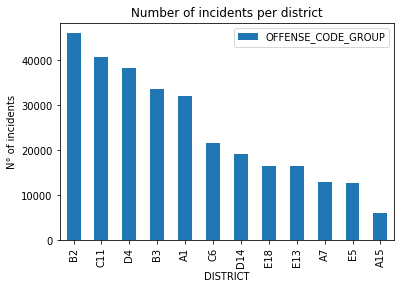

In [ ]:
#per district how many crimes are reported?
crimes_group_distr= crimes.groupby(by='DISTRICT')['OFFENSE_CODE_GROUP'].count()
crimes_group_distr= crimes_group_distr.sort_values(ascending= False) # sorted from high to low
display(crimes_group_distr)
crimes_group_distr.plot.bar()
plt.ylabel('N° of incidents')
plt.title('Number of incidents per district')
plt.legend()
# so in district B2 there are the most amount of crimes reported 


In [ ]:
#per district (group by) what is the most common OFFENSE_CODE_GROUP (crime code group) and month, day and hour

crimes_group_distr2= crimes.groupby(by='DISTRICT')['OFFENSE_CODE_GROUP','YEAR','MONTH','DAY_OF_WEEK','HOUR'].agg(pd.Series.mode) #agg(pd.Series.mode) or apply(lambda x: x.mode())
#crimes_group_distr= crimes_group_distr.sort_values(ascending= False)
display(crimes_group_distr2)
#crimes_group_distr.plot.bar()

# ==> almost every district has 'Motor Vehicle Accident Response' as most occcuring 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,OFFENSE_CODE_GROUP,YEAR,MONTH,DAY_OF_WEEK,HOUR
DISTRICT,,,,,
A1,LARCENY,2017,8,Saturday,Evening
A15,MOTOR VEHICLE ACCIDENT RESPONSE,2017,8,Wednesday,Morning
A7,MOTOR VEHICLE ACCIDENT RESPONSE,2017,8,Friday,Evening
B2,MOTOR VEHICLE ACCIDENT RESPONSE,2017,7,Thursday,Evening
B3,MOTOR VEHICLE ACCIDENT RESPONSE,2017,8,Monday,Evening
C11,MOTOR VEHICLE ACCIDENT RESPONSE,2016,7,Tuesday,Evening
C6,MOTOR VEHICLE ACCIDENT RESPONSE,2017,8,Friday,Evening
D14,MOTOR VEHICLE ACCIDENT RESPONSE,2017,8,Friday,Evening
D4,LARCENY,2017,7,Friday,Evening


In [ ]:
#per district (group by) what is the most common OFFENSE_DESCRIPTION (crime description)
crimes_group_distr3= crimes.groupby(by='DISTRICT')['OFFENSE_DESCRIPTION', 'MONTH', 'DAY_OF_WEEK', 'HOUR'].agg(pd.Series.mode)
display(crimes_group_distr3)

# different than OFFENCE_CODE_GROUP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,OFFENSE_DESCRIPTION,MONTH,DAY_OF_WEEK,HOUR
DISTRICT,,,,
A1,ASSAULT SIMPLE - BATTERY,8,Saturday,Evening
A15,INVESTIGATE PERSON,8,Wednesday,Morning
A7,SICK/INJURED/MEDICAL - PERSON,8,Friday,Evening
B2,VERBAL DISPUTE,7,Thursday,Evening
B3,VERBAL DISPUTE,8,Monday,Evening
C11,INVESTIGATE PERSON,7,Tuesday,Evening
C6,SICK/INJURED/MEDICAL - PERSON,8,Friday,Evening
D14,TOWED MOTOR VEHICLE,8,Friday,Evening
D4,LARCENY SHOPLIFTING,7,Friday,Evening


In [ ]:
# per district (group by) what is the most common  month, day, hour,  
crimes_group_distr4= crimes.groupby(by='DISTRICT')['MONTH', 'DAY_OF_WEEK', 'HOUR', 'YEAR'].agg(pd.Series.mode)
display(crimes_group_distr4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,MONTH,DAY_OF_WEEK,HOUR,YEAR
DISTRICT,,,,
A1,8,Saturday,Evening,2017
A15,8,Wednesday,Morning,2017
A7,8,Friday,Evening,2017
B2,7,Thursday,Evening,2017
B3,8,Monday,Evening,2017
C11,7,Tuesday,Evening,2016
C6,8,Friday,Evening,2017
D14,8,Friday,Evening,2017
D4,7,Friday,Evening,2017


In [ ]:
(crimes['SHOOTING']==1).sum() # 1019 
#976 after removing duplicates and rows with missing values 

976

plotting the coordinates

In [ ]:
# delete rows where coordinates are -1
lat_ = []
for i in range(len(lat)):
  if lat.iloc[i]!=-1:
    lat_.append(lat.iloc[i])
len(lat_)

long_ = []
for i in range(len(long)):
  if long.iloc[i]!=-1:
    long_.append(long.iloc[i])
len(long_)

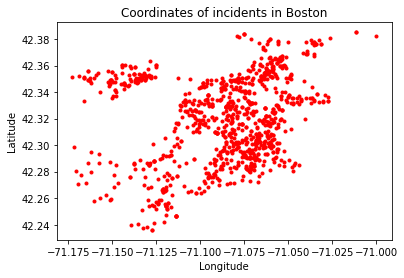

In [ ]:
# plot coordinates
import matplotlib.pyplot as plt
import numpy as np

x = long_[0:1000]
y = lat_[0:1000]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y, color='r',marker='.')
plt.show
plt.title('Coordinates of incidents in Boston')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('coordinates.png')


plotting the other variables


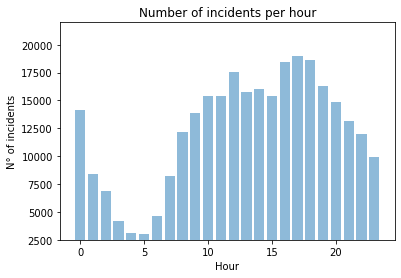

In [ ]:
# bar chart hour
import matplotlib.pyplot as plt
import numpy as np

hour_counts = []
for h in range(0,24):
  hour_counts.append(hour[hour==h].count())
hour_counts

plt.bar(range(0,24), hour_counts, align='center', alpha=0.5)
plt.ylabel('N° of incidents')
plt.ylim((2500,22000))
plt.xlabel('Hour')
plt.title('Number of incidents per hour')

plt.show()

No handles with labels found to put in legend.


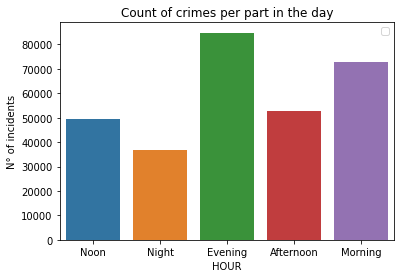

In [ ]:
# alternative with parts of day instead of hours  
sns.countplot(x='HOUR',data=crimes )
plt.title("Count of crimes per part in the day")
plt.ylabel('N° of incidents')
plt.legend()


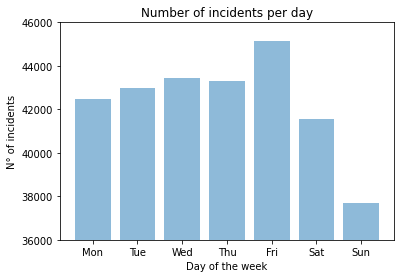

In [ ]:
# bar chart day 
import matplotlib.pyplot as plt
import numpy as np

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ds = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_counts = []
for d in days:
  day_counts.append(dayoftheweek[dayoftheweek==d].count())
day_counts

plt.bar(range(0,7), day_counts, align='center', alpha=0.5)
plt.ylabel('N° of incidents')
plt.ylim((36000,46000))
plt.xticks(range(0,7),ds)
plt.xlabel('Day of the week')
plt.title('Number of incidents per day')

plt.show()

Text(0.5, 1.0, 'Count of crimes reported as Shooting')

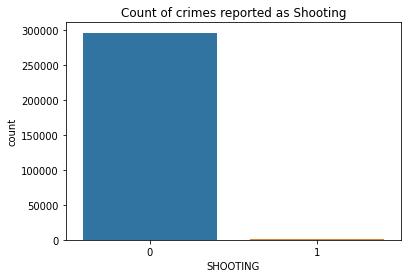

In [ ]:
# barchart SHOOTING
sns.countplot(x='SHOOTING',data=crimes )
plt.title("Count of crimes reported as Shooting")

Text(0.5, 1.0, 'Count of crimes per month')

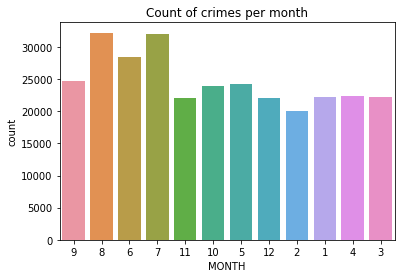

In [ ]:
# barchart month
sns.countplot(x='MONTH',data=crimes )
plt.title("Count of crimes per month")

Text(0.5, 1.0, 'Count of crimes per year')

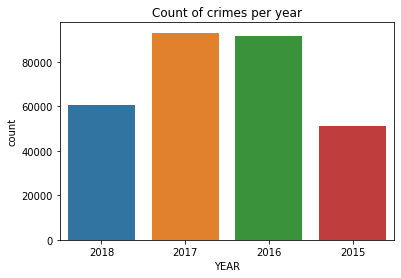

In [ ]:
# barchart year
sns.countplot(x='YEAR',data=crimes )
plt.title("Count of crimes per year")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

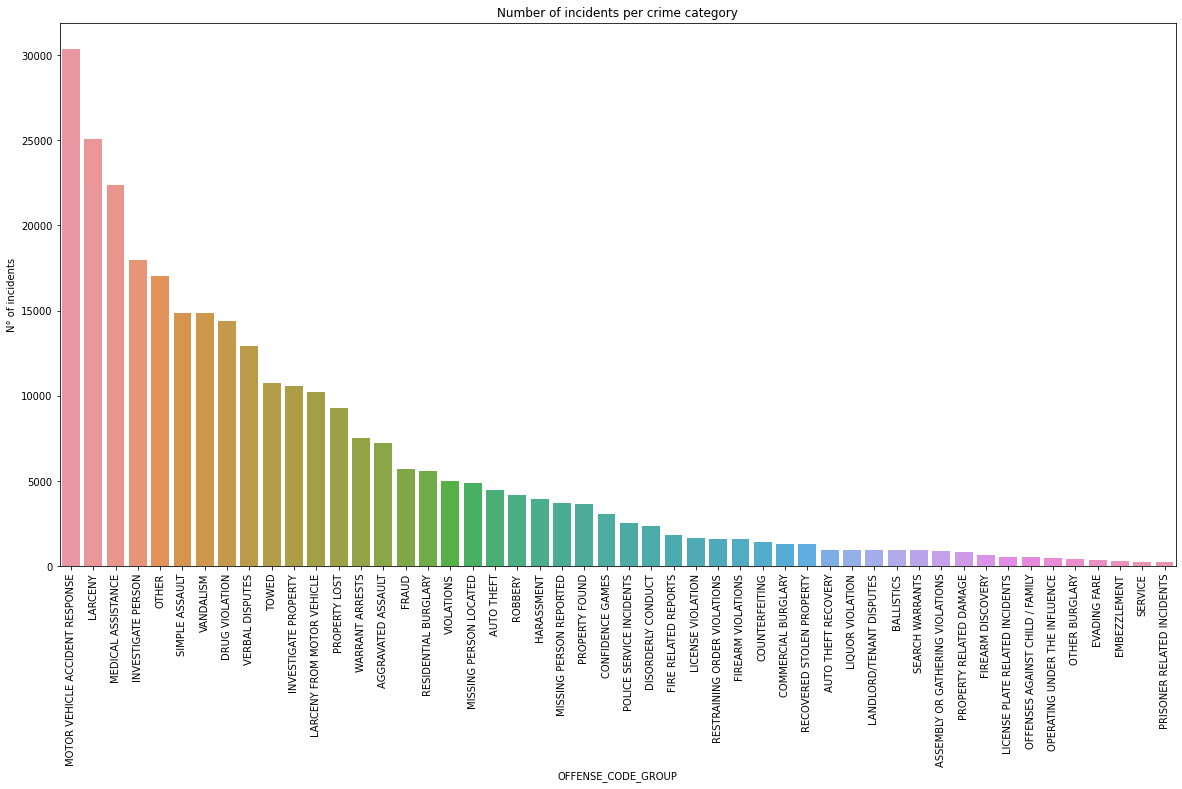

In [ ]:
#Boston crimes bar chart
offenses = pd.DataFrame(columns = ['OFFENSE_CODE_GROUP'])
offenses['OFFENSE_CODE_GROUP'] = [each for each in crimes.OFFENSE_CODE_GROUP.unique()]
offenses['Count']=[len(crimes[crimes.OFFENSE_CODE_GROUP==each]) for each in offenses.OFFENSE_CODE_GROUP]
offenses=offenses.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x=offenses.OFFENSE_CODE_GROUP.head(50), y=offenses.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('OFFENSE_CODE_GROUP')
plt.ylabel('N° of incidents')
plt.title('Number of incidents per crime category')
plt.show()

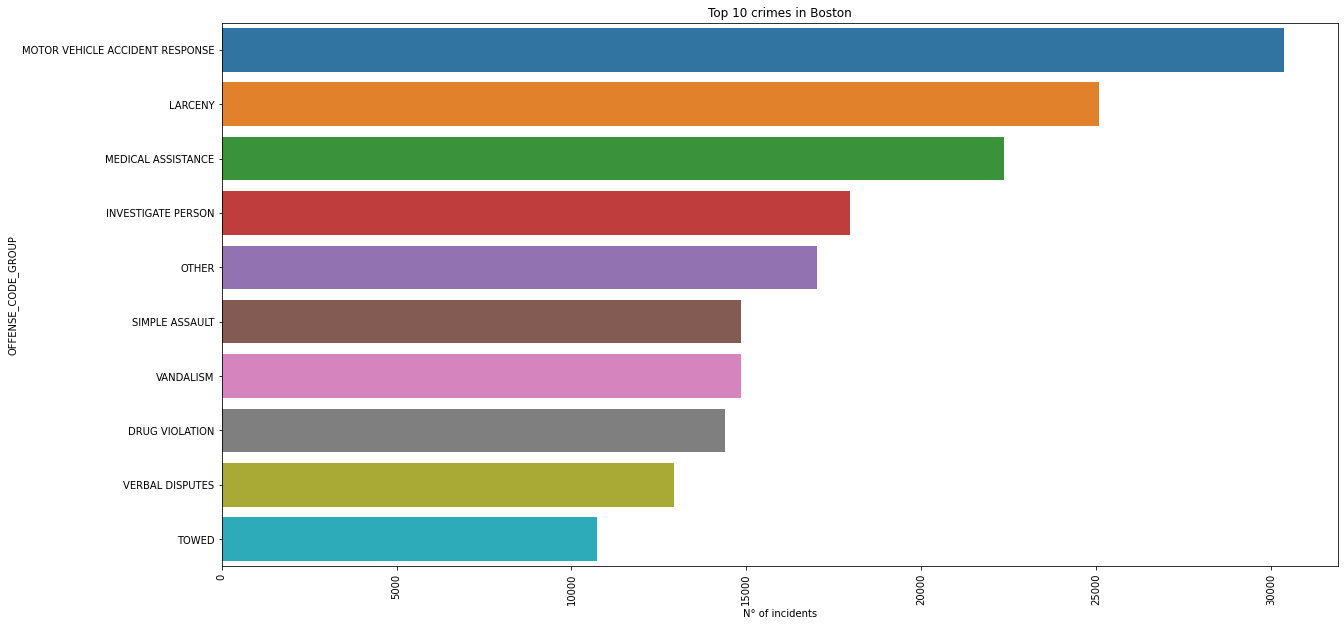

In [ ]:
# bar chart major crimes in Boston
plt.figure(figsize=(20,10))
sns.barplot(y=offenses.OFFENSE_CODE_GROUP.head(10), x=offenses.Count.head(10))
plt.xticks(rotation= 90)
plt.ylabel('OFFENSE_CODE_GROUP')
plt.xlabel('N° of incidents')
plt.title('Top 10 crimes in Boston')
plt.show()


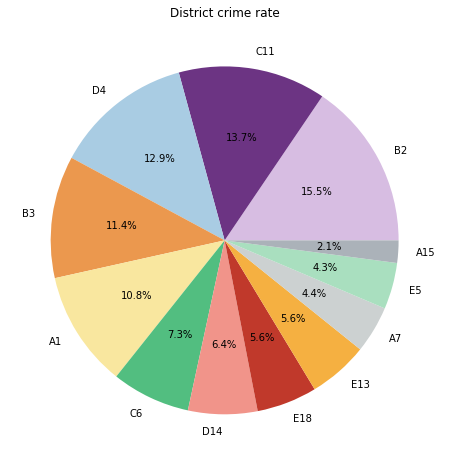

,DISTRICT,Count
4,B2,46035
1,C11,40720
2,D4,38233
3,B3,33682
6,A1,32073
5,C6,21678
0,D14,19105
10,E18,16622
9,E13,16516
8,A7,13015


In [ ]:
#pie chart of criminalized districts
import random
districts = pd.DataFrame(columns = ['DISTRICT'])
districts['DISTRICT'] = [each for each in crimes.DISTRICT.unique()]
districts['Count']=[len(crimes[crimes.DISTRICT==each]) for each in districts.DISTRICT]
districts=districts.sort_values(by=['Count'], ascending=False)
plt.figure(figsize=(8,8))
colours = ['#D7BDE2', '#6C3483', '#A9CCE3', '#EB984E', '#F9E79F', '#52BE80', '#F1948A', '#C0392B', '#F5B041', '#CCD1D1', '#A9DFBF', '#ABB2B9'] 
plt.pie(districts['Count'], labels=districts['DISTRICT'], autopct='%1.1f%%', colors=colours)
plt.title('District crime rate')
plt.show()
districts

In [ ]:
df = pd.DataFrame({"offense_code_group":crimes['OFFENSE_CODE_GROUP'], 
       "year":crimes['YEAR'],
       "count":np.ones(len(year))})
table = pd.pivot_table(df, index=['offense_code_group'], columns=['year'], values= 'count', aggfunc= np.sum, fill_value=0)
table

year,2015,2016,2017,2018
offense_code_group,,,,
AGGRAVATED ASSAULT,1318,2156,2227,1518
AIRCRAFT,4,4,17,5
ARSON,11,33,31,16
ASSEMBLY OR GATHERING VIOLATIONS,236,312,232,131
AUTO THEFT,934,1400,1305,861
...,...,...,...,...
TOWED,1539,3061,3731,2405
VANDALISM,2662,4845,4647,2691
VERBAL DISPUTES,1502,4044,4387,3014


In [ ]:
table[0:15,:]

NameError: ignored

# **3. MACHINE LEARNING**

USE A MACHINE LEARNING TOOL TO MAKE PREDICTIONS

In [ ]:
# import statements
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

In [ ]:
# create train validation and test data
X_train_v=Data_preprocessed_full_v.iloc[indices_train,]
X_test_v=Data_preprocessed_full_v.iloc[indices_test,]
X_val_v=Data_preprocessed_full_v.iloc[indices_val,]

X_train_d=Data_preprocessed_full_d.iloc[indices_train,]
X_test_d=Data_preprocessed_full_d.iloc[indices_test,]
X_val_d=Data_preprocessed_full_d.iloc[indices_val,]

X_train_a=Data_preprocessed_full_a.iloc[indices_train,]
X_test_a=Data_preprocessed_full_a.iloc[indices_test,]
X_val_a=Data_preprocessed_full_a.iloc[indices_val,]

X_train_m=Data_preprocessed_full_m.iloc[indices_train,]
X_test_m=Data_preprocessed_full_m.iloc[indices_test,]
X_val_m=Data_preprocessed_full_m.iloc[indices_val,]

Y_assault_train=assault_.iloc[indices_train,]
Y_assault_test=assault_.iloc[indices_test,]
Y_assault_val=assault_.iloc[indices_val,]

Y_drugs_train=drugs_.iloc[indices_train,]
Y_drugs_test=drugs_.iloc[indices_test,]
Y_drugs_val=drugs_.iloc[indices_val,]

Y_motor_train=motor_.iloc[indices_train,]
Y_motor_test=motor_.iloc[indices_test,]
Y_motor_val=motor_.iloc[indices_val,]

Y_vandalism_train=vandalism_.iloc[indices_train,]
Y_vandalism_test=vandalism_.iloc[indices_test,]
Y_vandalism_val=vandalism_.iloc[indices_val,]

In [ ]:
# vandalism: find optimal min instances per leaf
from sklearn import tree

# AUC values on the validation set are saved in the auc_val list
auc_val=[] # list initialization 
N=np.arange(1,10000,10) 
for n in N:
   clf = tree.DecisionTreeClassifier(min_samples_leaf = n, criterion='entropy')
   clf.fit(X_train_v, np.ravel(Y_vandalism_train))
   probs_val=clf.predict_proba(X_val_v)[:,1]
   auc_val.append(roc_auc_score(Y_vandalism_val, probs_val))
    
print("Grid search ended")
index_maximal_auc=np.argmax(auc_val)
n_optimal=N[index_maximal_auc]

print("The optimal value samples at a leaf node is %i" %n_optimal) #1

Grid search ended
The optimal value samples at a leaf node is 1


In [ ]:
# drugs: find optimal min instances per leaf
from sklearn import tree

# AUC values on the validation set are saved in the auc_val list
auc_val=[] # list initialization 
N=np.arange(1,10000,10) 
for n in N:
   clf = tree.DecisionTreeClassifier(min_samples_leaf = n, criterion='entropy')
   clf.fit(X_train_v, np.ravel(Y_drugs_train))
   probs_val=clf.predict_proba(X_val_d)[:,1]
   auc_val.append(roc_auc_score(Y_drugs_val, probs_val))
    
print("Grid search ended")
index_maximal_auc=np.argmax(auc_val)
n_optimal=N[index_maximal_auc]

print("The optimal value samples at a leaf node is %i" %n_optimal) #1

Grid search ended
The optimal value samples at a leaf node is 1


In [ ]:
# assault: find optimal min instances per leaf
from sklearn import tree

# AUC values on the validation set are saved in the auc_val list
auc_val=[] # list initialization 
N=np.arange(1,10000,10) 
for n in N:
   clf = tree.DecisionTreeClassifier(min_samples_leaf = n, criterion='entropy')
   clf.fit(X_train_v, np.ravel(Y_assault_train))
   probs_val=clf.predict_proba(X_val_a)[:,1]
   auc_val.append(roc_auc_score(Y_assault_val, probs_val))
    
print("Grid search ended")
index_maximal_auc=np.argmax(auc_val)
n_optimal=N[index_maximal_auc]

print("The optimal value samples at a leaf node is %i" %n_optimal) #71

Grid search ended
The optimal value samples at a leaf node is 71


In [ ]:
# motor: find optimal min instances per leaf
from sklearn import tree

# AUC values on the validation set are saved in the auc_val list
auc_val=[] # list initialization 
N=np.arange(1,10000,10) 
for n in N:
   clf = tree.DecisionTreeClassifier(min_samples_leaf = n, criterion='entropy')
   clf.fit(X_train_v, np.ravel(Y_motor_train))
   probs_val=clf.predict_proba(X_val_m)[:,1]
   auc_val.append(roc_auc_score(Y_motor_val, probs_val))
    
print("Grid search ended")
index_maximal_auc=np.argmax(auc_val)
n_optimal=N[index_maximal_auc]

print("The optimal value samples at a leaf node is %i" %n_optimal) #71

Grid search ended
The optimal value samples at a leaf node is 71


[Text(111.60000000000001, 190.26, 'X[23] <= 0.5\nentropy = 0.482\nsamples = 6400\nvalue = [5734, 666]'),
 Text(55.800000000000004, 135.9, 'entropy = 0.0\nsamples = 597\nvalue = [0, 597]'),
 Text(167.4, 135.9, 'X[26] <= 0.5\nentropy = 0.093\nsamples = 5803\nvalue = [5734, 69]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 61\nvalue = [0, 61]'),
 Text(223.20000000000002, 81.53999999999999, 'X[2] <= 0.5\nentropy = 0.015\nsamples = 5742\nvalue = [5734, 8]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(279.0, 27.180000000000007, 'entropy = 0.0\nsamples = 5734\nvalue = [5734, 0]')]

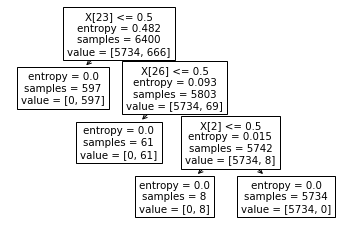

In [ ]:
# decision tree for vandalism
from sklearn import tree
clf_v = tree.DecisionTreeClassifier(min_samples_leaf = 1, criterion='entropy')
clf_v.fit(X_train_v, np.ravel(Y_vandalism_train))

#visualize tree
tree.plot_tree(clf_v)

[Text(111.60000000000001, 190.26, 'X[22] <= 0.5\nentropy = 0.482\nsamples = 6400\nvalue = [5734, 666]'),
 Text(55.800000000000004, 135.9, 'entropy = 0.0\nsamples = 589\nvalue = [0, 589]'),
 Text(167.4, 135.9, 'X[4] <= 0.5\nentropy = 0.102\nsamples = 5811\nvalue = [5734, 77]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 68\nvalue = [0, 68]'),
 Text(223.20000000000002, 81.53999999999999, 'X[13] <= 0.5\nentropy = 0.017\nsamples = 5743\nvalue = [5734, 9]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(279.0, 27.180000000000007, 'entropy = 0.0\nsamples = 5734\nvalue = [5734, 0]')]

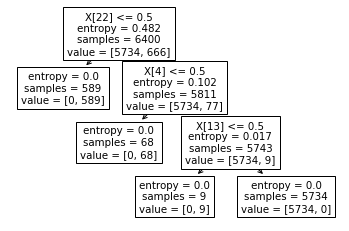

In [ ]:
# decision tree for drugs
from sklearn import tree
clf_d = tree.DecisionTreeClassifier(min_samples_leaf = 1, criterion='entropy')
clf_d.fit(X_train_d, np.ravel(Y_drugs_train))

#visualize tree
tree.plot_tree(clf_d)

[Text(167.4, 163.07999999999998, 'X[23] <= 0.5\nentropy = 0.482\nsamples = 6400\nvalue = [5734, 666]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 597\nvalue = [0, 597]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.093\nsamples = 5803\nvalue = [5734, 69]')]

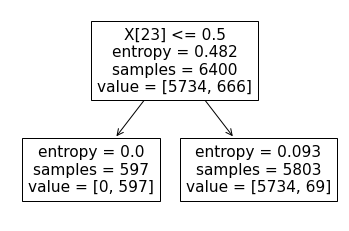

In [ ]:
# decision tree for assault
from sklearn import tree
clf_a = tree.DecisionTreeClassifier(min_samples_leaf = 71, criterion='entropy')
clf_a.fit(X_train_a, np.ravel(Y_assault_train))

#visualize tree
tree.plot_tree(clf_a)

[Text(167.4, 163.07999999999998, 'X[23] <= 0.5\nentropy = 0.482\nsamples = 6400\nvalue = [5734, 666]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 602\nvalue = [0, 602]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.088\nsamples = 5798\nvalue = [5734, 64]')]

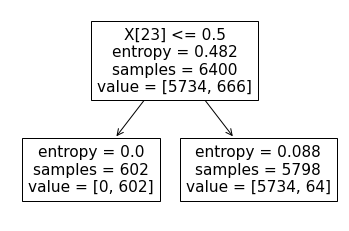

In [ ]:
# decision tree for motor 
from sklearn import tree
clf_m = tree.DecisionTreeClassifier(min_samples_leaf = 71, criterion='entropy')
clf_m.fit(X_train_m, np.ravel(Y_motor_train))

#visualize tree
tree.plot_tree(clf_m)

In [ ]:
# vandalism: make predictions on test set
y_test_labels_v = clf_v.predict(X_test_v)
y_test_scores_v = clf_v.predict_proba(X_test_v)[:,1]

# accuracy on test data
accuracy_test_v = accuracy_score(Y_vandalism_test,y_test_labels_v)
accuracy_test_v

1.0

In [ ]:
# confusion matrix vandalism
cf = confusion_matrix(Y_vandalism_test, y_test_labels_v)
cf

array([[1820,    0],
       [   0,  180]])

In [ ]:
# drugs: make predictions on test set
y_test_labels_d = clf_d.predict(X_test_d)
y_test_scores_d = clf_d.predict_proba(X_test_d)[:,1]

# accuracy and AUC on test data
accuracy_test_d = accuracy_score(Y_drugs_test,y_test_labels_d)
accuracy_test_d

0.9995

In [ ]:
# confusion matrix drugs
cf_d = confusion_matrix(Y_drugs_test, y_test_labels_d)
cf_d

array([[1820,    0],
       [   1,  179]])

In [ ]:
# assault: make predictions on test set
y_test_labels_a = clf_a.predict(X_test_a)
y_test_scores_a = clf_a.predict_proba(X_test_a)[:,1]

# accuracy and AUC on test data
accuracy_test_a = accuracy_score(Y_assault_test,y_test_labels_a)
accuracy_test_a

0.9915

In [ ]:
# confusion matrix assault
cf_a = confusion_matrix(Y_assault_test, y_test_labels_a)
cf_a

array([[1820,    0],
       [  17,  163]])

In [ ]:
# motor: make predictions on test set
y_test_labels_m = clf_a.predict(X_test_m)
y_test_scores_m = clf_a.predict_proba(X_test_m)[:,1]

# accuracy and AUC on test data
accuracy_test_m = accuracy_score(Y_motor_test,y_test_labels_m)
accuracy_test_m

0.993

In [ ]:
# confusion matrix motor
cf_m = confusion_matrix(Y_motor_test, y_test_labels_m)
cf_m

array([[1820,    0],
       [  14,  166]])